In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import os

In [16]:
wd = '/projects/ps-yeolab3/bay001/maps/current/se'
nse = os.path.join(wd,'204_01_RBFOX2.merged.r2.1.HepG2_native_cassette_exons.normed_matrix.txt')
bg = pd.read_table(nse, sep=',', index_col=0)

ex = os.path.join(wd,'204_01_RBFOX2.merged.r2.1.RBFOX2-BGHLV26-HepG2-excluded-upon-knockdown.normed_matrix.txt')
excl = pd.read_table(ex, sep=',', index_col=0)

In [31]:
def run_mannwhitney(test, bg, alt):
    """
    Compares each position 
    """
    mannwhitneyu_pvalues = []
    for position in test.columns:
        _, p = stats.mannwhitneyu(
            test[position], bg[position], alternative=alt
        )
        # print('p value at position {}: {}'.format(position, p))

        mannwhitneyu_pvalues.append(-1 * np.log10(p))
    return mannwhitneyu_pvalues

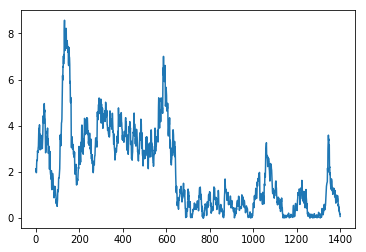

In [32]:
plt.plot(run_mannwhitney(excl, bg, 'two-sided'))

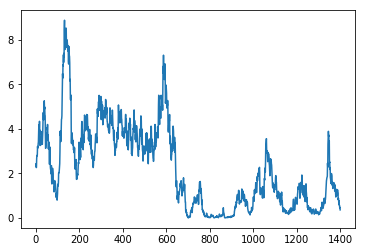

In [33]:
plt.plot(run_mannwhitney(excl, bg, 'less'))

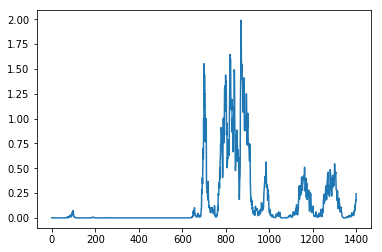

In [34]:
plt.plot(run_mannwhitney(excl, bg, 'greater'))

In [39]:
_, p = stats.mannwhitneyu(
    excl['868'], bg['868'], alternative='greater'
)
-np.log10(p)

1.3501809494760868